In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,930 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and dire

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 데이터 불러오기

In [4]:
df        = pd.read_csv('/content/drive/MyDrive/데이터분석스쿨/프로젝트/데이터 톤/최종합본_final.csv')

df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.drop(['총구매금액'], axis=1, inplace=True)   # 다시 계산해서 생성할 예정
df.head(2)

,주문 고유 ID,고객 ID,주문 상태,구매 시간,물류 처리 시간,실제 배송 날짜,기대 배송 날짜,고객 고유 ID,우편번호 앞부분,도시,...,리뷰 답변 시간,카테고리 이름,제품 무게(g),제품 길이(cm),제품 높이(cm),제품 너비(cm),상위 카테고리,판매자 우편번호 앞자리,판매자 도시(city),판매자 주(state)
0,ORDER_00000,CUSTOMER_62232,delivered,2018-10-02 10:56:33,2018-10-04 19:55:00,2018-10-10 21:25:13,2018-10-18,CUSTOMER_Unique_60785,3149,sao paulo,...,2018-10-12,home_utilities,500.0,19.0,8.0,13.0,home,9350.0,maua,SP
1,ORDER_00000,CUSTOMER_62232,delivered,2018-10-02 10:56:33,2018-10-04 19:55:00,2018-10-10 21:25:13,2018-10-18,CUSTOMER_Unique_60785,3149,sao paulo,...,2018-10-12,home_utilities,500.0,19.0,8.0,13.0,home,9350.0,maua,SP


In [5]:
df.columns

Index(['주문 고유 ID', '고객 ID', '주문 상태', '구매 시간', '물류 처리 시간', '실제 배송 날짜',
       '기대 배송 날짜', '고객 고유 ID', '우편번호 앞부분', '도시', '주', '주 한국명', '지역', '고객 위도',
       '고객 경도', '주문 품목 수', '제품 고유 ID', '판매자 고유 ID', '판매 가격', '품목 화물 가격',
       '결제 시퀀스', '지불 방법 ', '할부 횟수', '거래 금액', '리뷰 고유 ID', '리뷰 점수', '리뷰 생성 시간',
       '리뷰 답변 시간', '카테고리 이름', '제품 무게(g)', '제품 길이(cm)', '제품 높이(cm)',
       '제품 너비(cm)', '상위 카테고리', '판매자 우편번호 앞자리', '판매자 도시(city)', '판매자 주(state)'],
      dtype='object')

# 데이터 전처리

In [6]:
# 날짜 타입 변경
df['구매 시간']      = pd.to_datetime(df['구매 시간']).astype('datetime64[ns]')
df['물류 처리 시간'] = pd.to_datetime(df['물류 처리 시간']).astype('datetime64[ns]')
df['실제 배송 날짜'] = pd.to_datetime(df['실제 배송 날짜']).astype('datetime64[ns]')
df['기대 배송 날짜'] = pd.to_datetime(df['기대 배송 날짜']).astype('datetime64[ns]')
df['리뷰 생성 시간'] = pd.to_datetime(df['리뷰 생성 시간']).astype('datetime64[ns]')
df['리뷰 답변 시간'] = pd.to_datetime(df['리뷰 답변 시간']).astype('datetime64[ns]')

In [7]:
# 결측치 확인
df.isnull().sum()

주문 고유 ID          0
고객 ID             0
주문 상태             0
구매 시간             0
물류 처리 시간          0
실제 배송 날짜          0
기대 배송 날짜          0
고객 고유 ID          0
우편번호 앞부분          0
도시                0
주                 0
주 한국명           323
지역              323
고객 위도           323
고객 경도           323
주문 품목 수           1
제품 고유 ID          1
판매자 고유 ID         1
판매 가격             1
품목 화물 가격          1
결제 시퀀스            1
지불 방법             1
할부 횟수             1
거래 금액             1
리뷰 고유 ID        810
리뷰 점수           810
리뷰 생성 시간        810
리뷰 답변 시간        810
카테고리 이름          21
제품 무게(g)         21
제품 길이(cm)        21
제품 높이(cm)        21
제품 너비(cm)        21
상위 카테고리          21
판매자 우편번호 앞자리      1
판매자 도시(city)      1
판매자 주(state)      1
dtype: int64

In [8]:
# 결측치 있는 행 삭제
df.drop(32703, axis=0, inplace=True)

In [9]:
# 총구매금액 계산 (고객별로 거래 금액을 합산) 후 컬럼 추가
df['총구매금액'] = df.groupby('고객 ID')['거래 금액'].transform('sum')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105766 entries, 0 to 105766
Data columns (total 38 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   주문 고유 ID      105766 non-null  object        
 1   고객 ID         105766 non-null  object        
 2   주문 상태         105766 non-null  object        
 3   구매 시간         105766 non-null  datetime64[ns]
 4   물류 처리 시간      105766 non-null  datetime64[ns]
 5   실제 배송 날짜      105766 non-null  datetime64[ns]
 6   기대 배송 날짜      105766 non-null  datetime64[ns]
 7   고객 고유 ID      105766 non-null  object        
 8   우편번호 앞부분      105766 non-null  int64         
 9   도시            105766 non-null  object        
 10  주             105766 non-null  object        
 11  주 한국명         105443 non-null  object        
 12  지역            105443 non-null  object        
 13  고객 위도         105443 non-null  float64       
 14  고객 경도         105443 non-null  float64       
 15  주문 품목 수       105766 n

# R 분석

- 고객이 최근에 구매했는가
    - 고객별 최근 구매 일자 확인
        - R지표 = 전체데이터 중 가장 구매일자 - 고객별 최근 구매일자

In [11]:
# Recency 분석을 위한 데이터 추출
df_user = pd.DataFrame(df['고객 고유 ID']).drop_duplicates()
df_max_purchase = df.groupby('고객 고유 ID')['구매 시간'].max().reset_index()
df_max_purchase.rename(columns={'구매 시간': 'maxPurchaseDate'},inplace=True)

# 가장 최근 구매 일자 - 고객번호별 최근 구매일자
df_max_purchase['recency'] = (df_max_purchase['maxPurchaseDate'].max() - df_max_purchase['maxPurchaseDate']).dt.days
recency_df = pd.merge(df_user, df_max_purchase, on='고객 고유 ID')

recency_df.recency.describe()

count    85111.000000
mean       227.969158
std        143.225912
min          0.000000
25%        110.000000
50%        206.000000
75%        331.000000
max        664.000000
Name: recency, dtype: float64

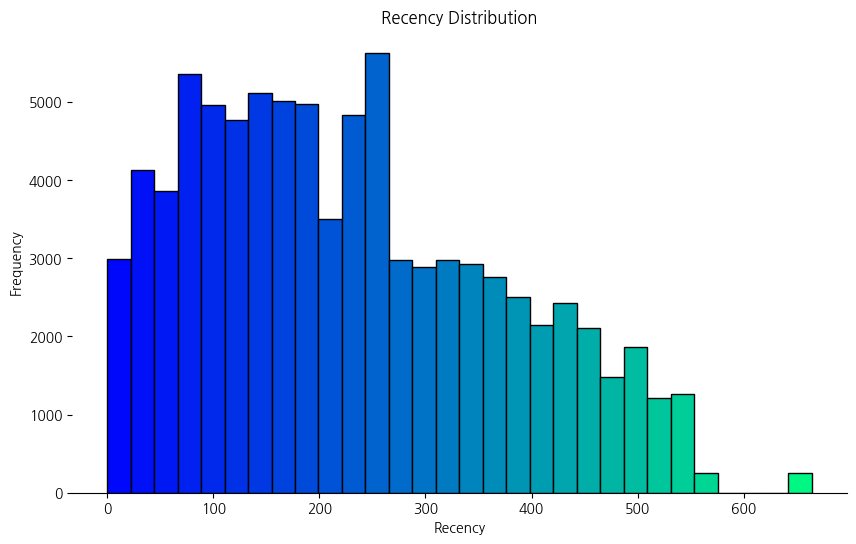

In [12]:
# recency_df 분포 확인
fig, ax = plt.subplots(figsize=(10, 6))
sns.despine(left=True)
n, bins, patches = plt.hist(recency_df['recency'], bins=30, edgecolor='black')

# 'winter' 팔레트를 사용하여 각 막대 색상 설정
palette = sns.color_palette('winter', len(patches))
for color, patch in zip(palette, patches):
    patch.set_facecolor(color)

plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

# F 분석

- Frequency 구매 빈도
    - F지표 = 고객별 구매 횟수

In [13]:
# Frequency 분석을 위한 데이터 추출
tmp = df[['주문 고유 ID', '고객 고유 ID']].drop_duplicates()
frequency_df = tmp.groupby('고객 고유 ID')['주문 고유 ID'].count().reset_index()

# 고객 고유 아이디로 그룹화 한다음 방문횟수를 구해야 한다.
# 여기서는 방문횟수를 주문 고유 ID 개수로 생각했으므로 주문 고유 ID에 count를 적용한다.
frequency_df = frequency_df.rename(columns={'주문 고유 ID':'Frequency'})
frequency_df.Frequency.describe()

count    85111.000000
mean         1.033403
std          0.207316
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         12.000000
Name: Frequency, dtype: float64

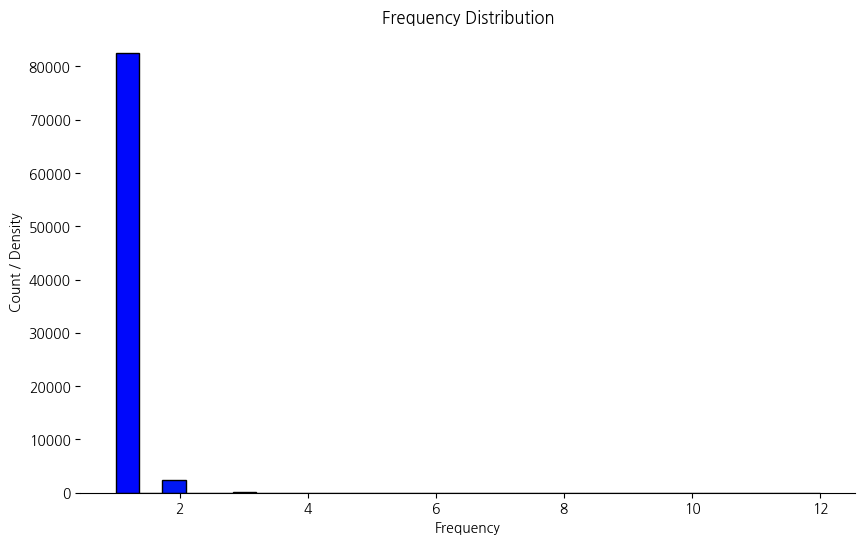

In [14]:
# frequency_df 분포 확인
fig, ax = plt.subplots(figsize=(10, 6))
sns.despine(left=True)
n, bins, patches = plt.hist(frequency_df['Frequency'], bins=30, edgecolor='black')

# 'winter' 팔레트를 사용하여 각 막대 색상 설정
palette = sns.color_palette('winter', len(patches))
for color, patch in zip(palette, patches):
    patch.set_facecolor(color)

plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count / Density')
plt.show()

# M 분석

In [15]:
# Monetary 분석을 위한 데이터 추출
monetary_df = df.groupby('고객 고유 ID')['총구매금액'].sum().reset_index()
monetary_df.rename(columns={'총구매금액' : 'monetary'},inplace=True)
monetary_df.monetary.describe()

count     85111.000000
mean        445.763462
std        6400.628990
min          10.070000
25%          64.620000
50%         116.360000
75%         221.735000
max      905120.000000
Name: monetary, dtype: float64

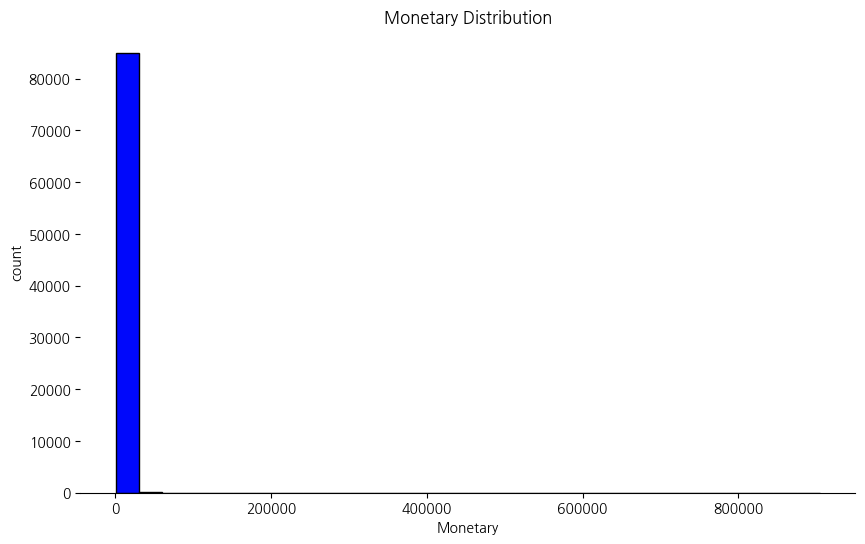

In [16]:
# monetary_df 분포 확인
fig, ax = plt.subplots(figsize=(10, 6))
sns.despine(left=True)
n, bins, patches = plt.hist(monetary_df['monetary'], bins=30, edgecolor='black')

# 'winter' 팔레트를 사용하여 각 막대 색상 설정
palette = sns.color_palette('winter', len(patches))
for color, patch in zip(palette, patches):
    patch.set_facecolor(color)

plt.title('Monetary Distribution')
plt.xlabel('Monetary')
plt.ylabel('count')
plt.show()

# RFM 데이터 만들기

In [17]:
# recency_df, frequency_df, monetary_df 조인해서 csv로 저장하기
rfm = pd.merge(recency_df, frequency_df, on='고객 고유 ID')
rfm = pd.merge(rfm, monetary_df, on='고객 고유 ID')
rfm.to_csv('rfm.csv', index=False)

- 재구매 고객과 1회 구매 고객을 분류하여 각각 고객 등급 세분화를 진행해야 하므로 Frequency 값이 1인 데이터프레임과 2이상인 데이터 프레임을 만들어서 진행한다.

# 1회 구매고객에 대한 고객 등급 세분화

In [18]:
rfm_nonrepurchase = rfm[rfm['Frequency'] == 1]
rfm_nonrepurchase=rfm_nonrepurchase[['고객 고유 ID','recency','Frequency','monetary']]
rfm_nonrepurchase.shape

(82553, 4)

## 데이터 전처리

### R지표 로그변환 + 스케일링

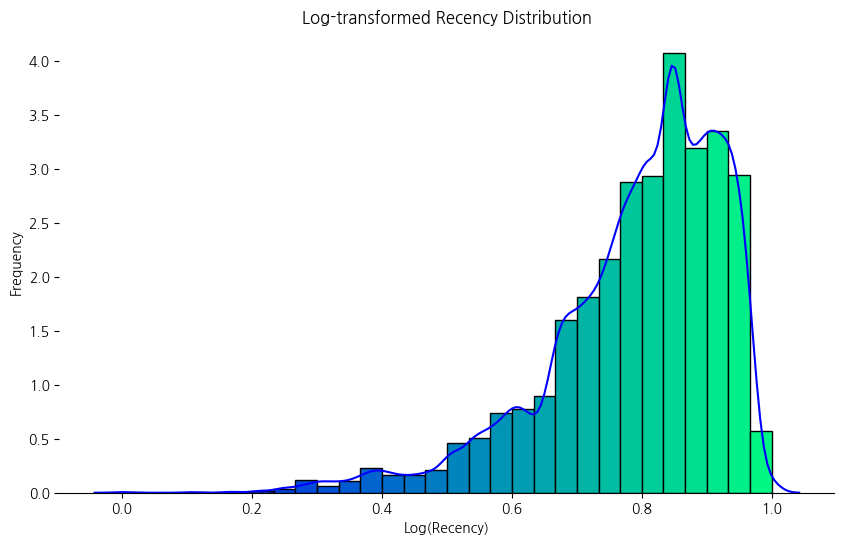

In [19]:
# 로그변환
rfm_nonrepurchase['recency_log'] = np.log1p(rfm_nonrepurchase['recency'])

# MinMax 스케일링
scaler = MinMaxScaler()
rfm_nonrepurchase['recency_log_norm'] = scaler.fit_transform(rfm_nonrepurchase['recency_log'].values.reshape(-1,1))

# 히스토그램 생성
fig, ax = plt.subplots(figsize=(10, 6))
sns.despine(left=True)
n, bins, patches = plt.hist(rfm_nonrepurchase['recency_log_norm'], bins=30, edgecolor='black', density=True)

# 'winter' 팔레트를 사용하여 각 막대 색상 설정
palette = sns.color_palette('winter', len(patches))
for color, patch in zip(palette, patches):
    patch.set_facecolor(color)

# KDE plot 추가
sns.kdeplot(rfm_nonrepurchase['recency_log_norm'], color='blue', ax=ax)

plt.title('Log-transformed Recency Distribution')
plt.xlabel('Log(Recency)')
plt.ylabel('Frequency')
plt.show()

### M지표 로그변환 + 스케일링

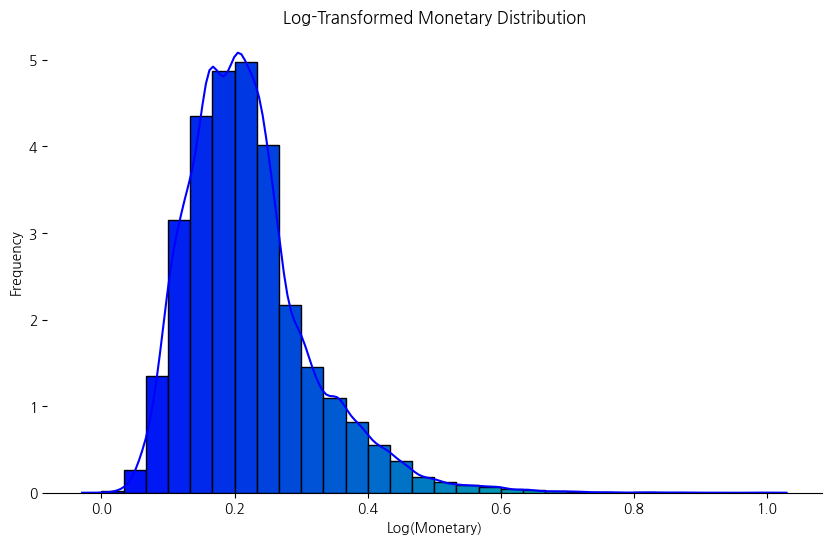

In [20]:
# 로그변환
rfm_nonrepurchase['monetary_log'] = np.log1p(rfm_nonrepurchase['monetary'])

# MinMax 스케일링
rfm_nonrepurchase['monetary_log_norm'] = scaler.fit_transform(rfm_nonrepurchase['monetary_log'].values.reshape(-1,1))

# 히스토그램 생성
fig, ax = plt.subplots(figsize=(10, 6))
sns.despine(left=True)
n, bins, patches = plt.hist(rfm_nonrepurchase['monetary_log_norm'], bins=30, edgecolor='black', density=True)

# 'winter' 팔레트를 사용하여 각 막대 색상 설정
palette = sns.color_palette('winter', len(patches))
for color, patch in zip(palette, patches):
    patch.set_facecolor(color)

# KDE plot 추가
sns.kdeplot(rfm_nonrepurchase['monetary_log_norm'], color='blue', ax=ax)

plt.title('Log-Transformed Monetary Distribution')
plt.xlabel('Log(Monetary)')
plt.ylabel('Frequency')
plt.show()

In [21]:
rfm_nonrepurchase = rfm_nonrepurchase.drop(['recency_log', 'monetary_log'], axis=1)

rfm_nonrepurchase.head()

,고객 고유 ID,recency,Frequency,monetary,recency_log_norm,monetary_log_norm
1,CUSTOMER_Unique_52983,253,1,72.20,0.851925,0.166993
2,CUSTOMER_Unique_58227,166,1,28.62,0.787409,0.087009
3,CUSTOMER_Unique_59164,385,1,175.26,0.916313,0.244680
4,CUSTOMER_Unique_74753,440,1,75.16,0.936807,0.170498
5,CUSTOMER_Unique_31015,552,1,35.95,0.971625,0.106557


## RM 스코어 계산

In [22]:
# 점수화
bins=4
rfm_nonrepurchase['R-Score'] = pd.qcut(rfm_nonrepurchase['recency_log_norm'], q=bins, labels=range(bins, 0, -1))
rfm_nonrepurchase['M-Score'] = pd.qcut(rfm_nonrepurchase['monetary_log_norm'], q=bins, labels=range(1, bins+1))

rfm_nonrepurchase.head()

,고객 고유 ID,recency,Frequency,monetary,recency_log_norm,monetary_log_norm,R-Score,M-Score
1,CUSTOMER_Unique_52983,253,1,72.20,0.851925,0.166993,2,2
2,CUSTOMER_Unique_58227,166,1,28.62,0.787409,0.087009,3,1
3,CUSTOMER_Unique_59164,385,1,175.26,0.916313,0.244680,1,3
4,CUSTOMER_Unique_74753,440,1,75.16,0.936807,0.170498,1,2
5,CUSTOMER_Unique_31015,552,1,35.95,0.971625,0.106557,1,1


## 1회 구매 고객 등급 세분화

In [23]:

# 고객 그룹화
def segment_customers(row):
    r_score_str = str(row['R-Score'])
    m_score_str = str(row['M-Score'])

    if r_score_str + m_score_str in ['11', '12','13','21']:
        return '휴면 고객'
    elif r_score_str + m_score_str in ['14','22','23','31']:
        return '잠재 고객'
    elif r_score_str + m_score_str in ['33','41','42','32']:
        return '관심 필요 고객'
    elif r_score_str + m_score_str in ['43','24']:
        return '놓치면 안될 고객'
    elif r_score_str + m_score_str in ['34','44']:
        return '집중 관리 고객'
    else:
        return '기타'

rfm_nonrepurchase['Segment'] = rfm_nonrepurchase.apply(segment_customers, axis=1)

# 결과 확인
print(rfm_nonrepurchase[['R-Score','M-Score', 'Segment']])
display(rfm_nonrepurchase.head(3))

      R-Score M-Score   Segment
1           2       2     잠재 고객
2           3       1     잠재 고객
3           1       3     휴면 고객
4           1       2     휴면 고객
5           1       1     휴면 고객
...       ...     ...       ...
85106       1       2     휴면 고객
85107       3       3  관심 필요 고객
85108       1       4     잠재 고객
85109       3       4  집중 관리 고객
85110       3       2  관심 필요 고객

[82553 rows x 3 columns]


,고객 고유 ID,recency,Frequency,monetary,recency_log_norm,monetary_log_norm,R-Score,M-Score,Segment
1,CUSTOMER_Unique_52983,253,1,72.20,0.851925,0.166993,2,2,잠재 고객
2,CUSTOMER_Unique_58227,166,1,28.62,0.787409,0.087009,3,1,잠재 고객
3,CUSTOMER_Unique_59164,385,1,175.26,0.916313,0.244680,1,3,휴면 고객


### 각 등급별 R,M score 범위 확인

In [24]:
# 각 등급 별로 RFM 점수의 범위 확인
def print_score_ranges(df,segment):
    score = df[df['Segment']==segment][['recency','monetary']]
    score_ranges = {
        'recency': (score['recency'].min(), score['recency'].max()),
        'monetary': (score['monetary'].min(), score['monetary'].max())
    }
    print(f"{segment}의 RFM 점수 범위:")
    print(f"{segment} Recency 범위:", score_ranges['recency'])
    print(f"{segment} Monetary 범위:", score_ranges['monetary'])

segments= rfm_nonrepurchase['Segment'].unique()
for segment in segments:
    print_score_ranges(rfm_nonrepurchase,segment)

잠재 고객의 RFM 점수 범위:
잠재 고객 Recency 범위: (112, 664)
잠재 고객 Monetary 범위: (13.36, 905120.0)
휴면 고객의 RFM 점수 범위:
휴면 고객 Recency 범위: (207, 664)
휴면 고객 Monetary 범위: (10.07, 213.52)
관심 필요 고객의 RFM 점수 범위:
관심 필요 고객 Recency 범위: (0, 206)
관심 필요 고객 Monetary 범위: (10.89, 213.55)
놓치면 안될 고객의 RFM 점수 범위:
놓치면 안될 고객 Recency 범위: (0, 332)
놓치면 안될 고객 Monetary 범위: (113.69, 874501.12)
집중 관리 고객의 RFM 점수 범위:
집중 관리 고객 Recency 범위: (1, 206)
집중 관리 고객 Monetary 범위: (213.58, 880960.0)


### 1회 구매 고객 등급별 고객 수 시각화

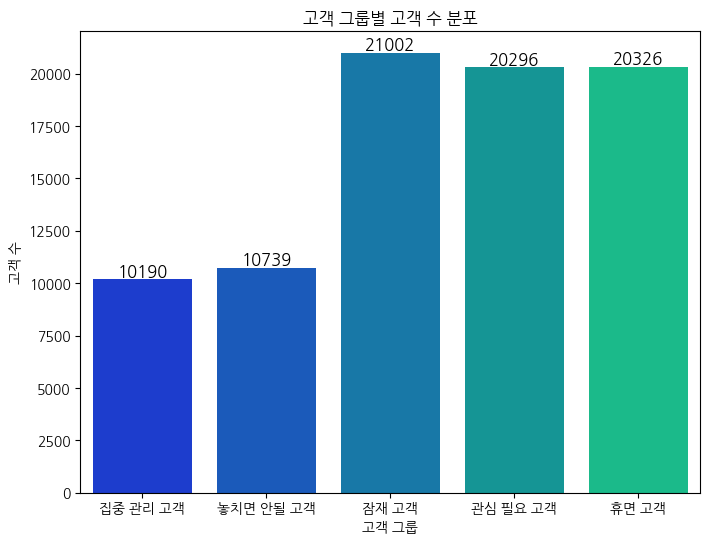

In [25]:
customer_counts = rfm_nonrepurchase['Segment'].value_counts().sort_index()
orders=['집중 관리 고객','놓치면 안될 고객','잠재 고객','관심 필요 고객','휴면 고객']
customer_counts = customer_counts.reindex(orders)
# 고객 그룹 별 고객 수 시각화
plt.figure(figsize=(8, 6))
bars = sns.barplot(x=customer_counts.index, y=customer_counts.values, palette='winter')

# 막대 위에 숫자 표시
for bar, count in zip(bars.patches, customer_counts.values):
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_height() + 5  # 숫자를 막대 위에 조금 띄움
    bars.text(text_x, text_y, count, ha='center', va='bottom', fontsize=12)

# 그래프 제목과 축 이름 설정
plt.title('고객 그룹별 고객 수 분포')
plt.xlabel('고객 그룹')
plt.ylabel('고객 수')

plt.show()

### 고객 등급별 총 구매금액

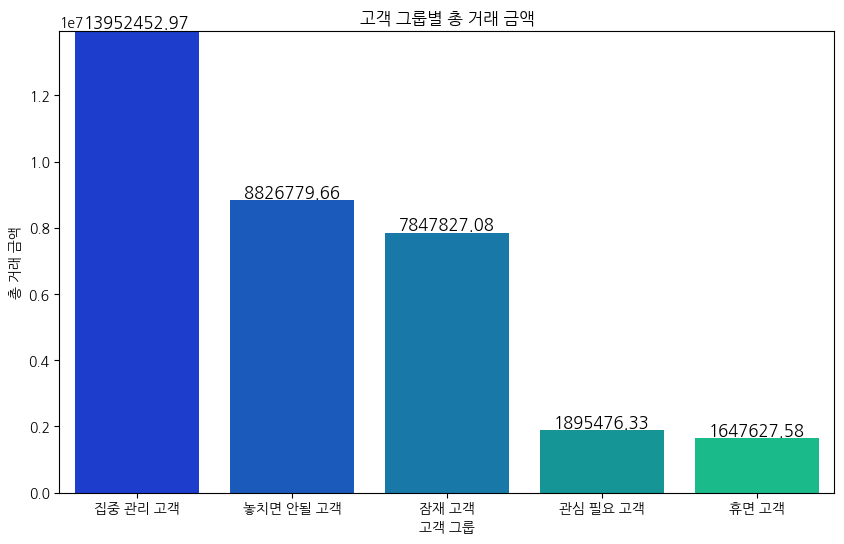

In [26]:
# 고객 그룹 별 총 거래 금액 확인 및 정렬
total_sales_by_group = rfm_nonrepurchase.groupby('Segment')['monetary'].sum().reset_index()
total_sales_by_group = total_sales_by_group.sort_values(by='monetary', ascending=False)

# 고객 그룹 별 총 거래 금액 시각화
plt.figure(figsize=(10, 6))
bars = sns.barplot(x='Segment', y='monetary', data=total_sales_by_group, palette='winter')

# 막대 위에 금액 표시
for bar, amount in zip(bars.patches, total_sales_by_group['monetary']):
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_height() + 0.5  # 숫자를 막대 위에 조금 띄움
    bars.text(text_x, text_y, f'{amount:.2f}', ha='center', va='bottom', fontsize=12)

# 그래프 제목과 축 이름 설정
plt.title('고객 그룹별 총 거래 금액')
plt.xlabel('고객 그룹')
plt.ylabel('총 거래 금액')
plt.ylim(0, total_sales_by_group['monetary'].max() + 1000)  # y축 범위 설정
plt.show()

### 고객 등급별 1인 평균 구매액

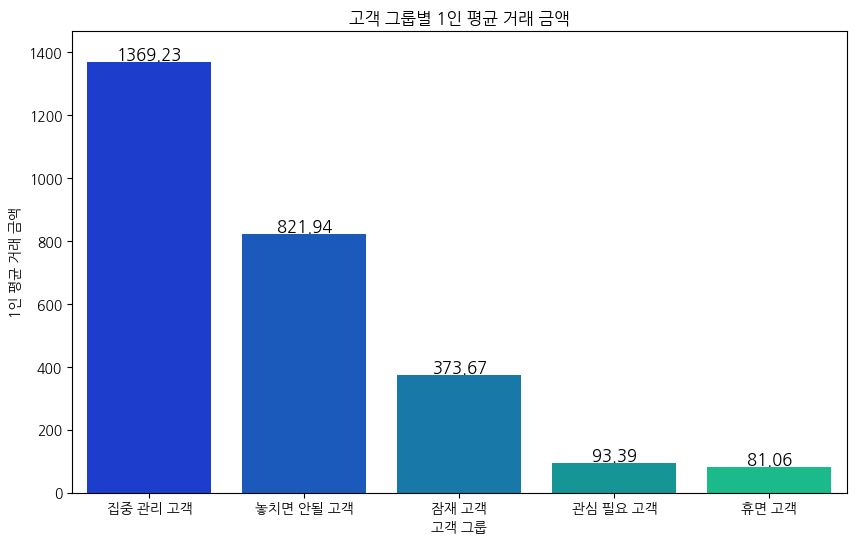

In [27]:
# 고객 그룹 별 총 거래 금액 및 고객 수 계산
grouped_sales = rfm_nonrepurchase.groupby('Segment')['monetary'].agg(['sum', 'count']).reset_index()
grouped_sales['1인 평균 거래 금액'] = grouped_sales['sum'] / grouped_sales['count']

# 1인 평균 거래 금액을 기준으로 데이터프레임 정렬
grouped_sales = grouped_sales.sort_values(by='1인 평균 거래 금액', ascending=False)

# 고객 그룹 별 1인 평균 거래 금액 시각화
plt.figure(figsize=(10, 6))
bars = sns.barplot(x='Segment', y='1인 평균 거래 금액', data=grouped_sales, palette='winter')

# 막대 위에 금액 표시
for bar, avg_amount in zip(bars.patches, grouped_sales['1인 평균 거래 금액']):
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_height() + 0.5  # 숫자를 막대 위에 조금 띄움
    bars.text(text_x, text_y, f'{avg_amount:.2f}', ha='center', va='bottom', fontsize=12)

# 그래프 제목과 축 이름 설정
plt.title('고객 그룹별 1인 평균 거래 금액')
plt.xlabel('고객 그룹')
plt.ylabel('1인 평균 거래 금액')
plt.ylim(0, grouped_sales['1인 평균 거래 금액'].max() + 100)  # y축 범위 설정
plt.show()

### 고객 등급별 매출 비중

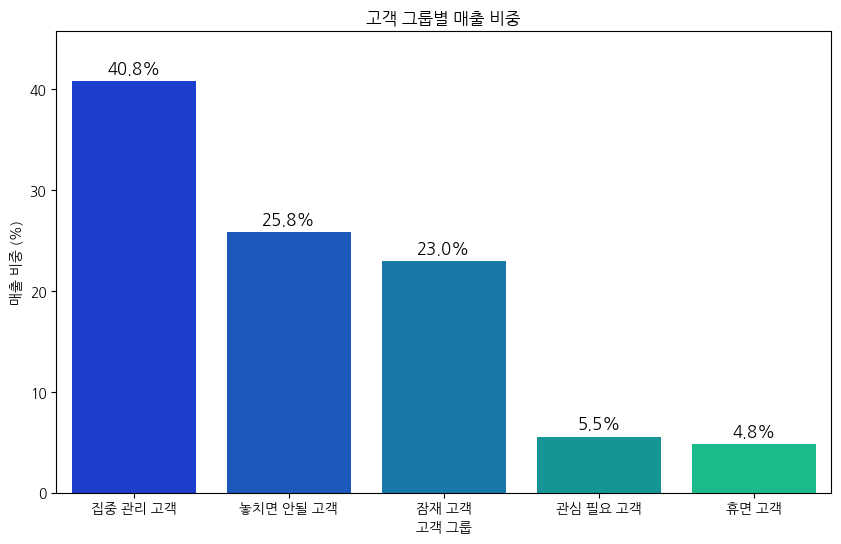

In [28]:
# 고객 등급별 매출 비중 계산
total_sales = rfm_nonrepurchase['monetary'].sum()
rfm_df_grouped = rfm_nonrepurchase.groupby('Segment', as_index=False)['monetary'].sum()
rfm_df_grouped['매출 백분율'] = rfm_df_grouped['monetary'] / total_sales * 100
rfm_df_grouped = rfm_df_grouped.sort_values(by='매출 백분율',ascending=False)

# 고객 등급별 매출 비중 시각화
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=rfm_df_grouped['Segment'], y=rfm_df_grouped['매출 백분율'], palette='winter')

# 막대 위에 비중 표시
for bar, perc in zip(bars.patches, rfm_df_grouped['매출 백분율']):
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_height() + 0.5  # 숫자를 막대 위에 조금 띄움
    bars.text(text_x, text_y, f'{perc:.1f}%', ha='center', va='bottom', fontsize=12)

# 그래프 제목과 축 이름 설정
plt.title('고객 그룹별 매출 비중')
plt.xlabel('고객 그룹')
plt.ylabel('매출 비중 (%)')
plt.ylim(0, rfm_df_grouped['매출 백분율'].max() + 5)  # y축 범위 설정
plt.show()

## 1회 구매 고객 세분화 요약

In [70]:
# 고객 그룹 별 고객 수, 비율, 총 구매금액, 1인 평균 구매금액 계산
customer_counts = rfm_nonrepurchase['Segment'].value_counts().sort_index()
customer_percentages = customer_counts / customer_counts.sum() * 100
total_sales = rfm_nonrepurchase.groupby('Segment')['monetary'].sum()
per_sales = round(total_sales / rfm_nonrepurchase['monetary'].sum() * 100,2)
average_sales = total_sales / customer_counts


# 데이터 프레임 생성
summary_table = pd.DataFrame({
    '고객 수': customer_counts,
    '고객 비율 (%)': round(customer_percentages,2),
    '총 구매 금액': total_sales,
    '매출 비중 (%)':per_sales,
    '1인 평균 구매금액': average_sales
})

# 데이터 프레임 인덱스 설정
summary_table.index.name = '고객 그룹'

# 고객 그룹 순서 재정렬
summary_table = summary_table.reindex(orders)

# 데이터 프레임 출력
summary_table

,고객 수,고객 비율 (%),총 구매 금액,매출 비중 (%),1인 평균 구매금액
고객 그룹,,,,,
집중 관리 고객,10190,12.34,13952452.97,40.83,1369.229928
놓치면 안될 고객,10739,13.01,8826779.66,25.83,821.936834
잠재 고객,21002,25.44,7847827.08,22.97,373.670464
관심 필요 고객,20296,24.59,1895476.33,5.55,93.391621
휴면 고객,20326,24.62,1647627.58,4.82,81.060099


# 재구매 고객에 대한 등급 세분화

In [98]:
rfm_repurchase = rfm[rfm['Frequency'] >= 2]
rfm_repurchase=rfm_repurchase[['고객 고유 ID','recency','Frequency','monetary']]
rfm_repurchase.shape

(2558, 4)

## 데이터 전처리

### R지표 로그변환 + 스케일링

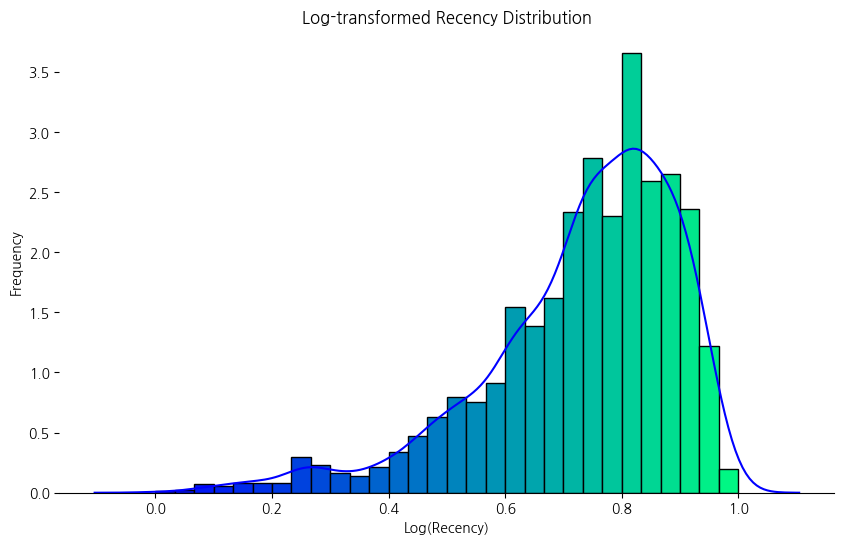

In [99]:
# 로그변환
rfm_repurchase['recency_log'] = np.log1p(rfm_repurchase['recency'])

# MinMax 스케일링
scaler = MinMaxScaler()
rfm_repurchase['recency_log_norm'] = scaler.fit_transform(rfm_repurchase['recency_log'].values.reshape(-1,1))

# 히스토그램 생성
fig, ax = plt.subplots(figsize=(10, 6))
sns.despine(left=True)
n, bins, patches = plt.hist(rfm_repurchase['recency_log_norm'], bins=30, edgecolor='black', density=True)

# 'winter' 팔레트를 사용하여 각 막대 색상 설정
palette = sns.color_palette('winter', len(patches))
for color, patch in zip(palette, patches):
    patch.set_facecolor(color)

# KDE plot 추가
sns.kdeplot(rfm_repurchase['recency_log_norm'], color='blue', ax=ax)

plt.title('Log-transformed Recency Distribution')
plt.xlabel('Log(Recency)')
plt.ylabel('Frequency')
plt.show()

### F지표 로그변환 + 스케일링

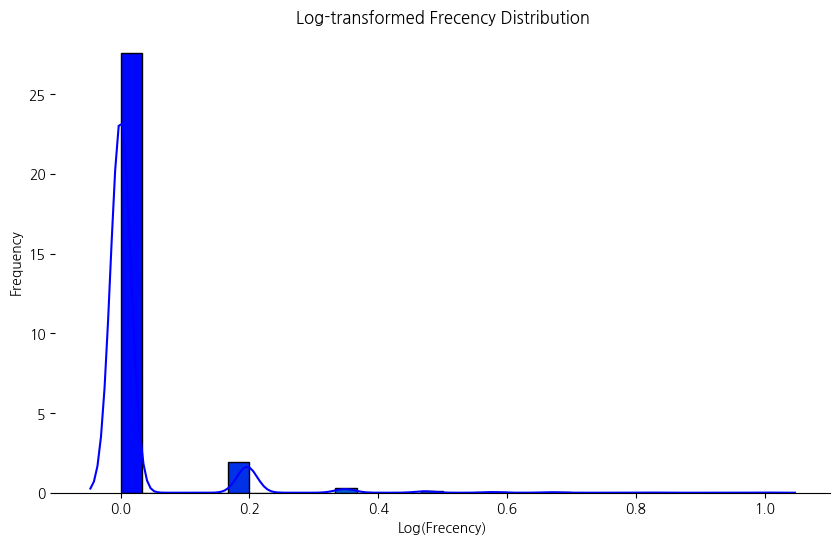

In [100]:
# 로그변환
rfm_repurchase['frequency_log'] = np.log1p(rfm_repurchase['Frequency'])

# MinMax 스케일링
scaler = MinMaxScaler()
rfm_repurchase['frequency_log_norm'] = scaler.fit_transform(rfm_repurchase['frequency_log'].values.reshape(-1,1))

# 히스토그램 생성
fig, ax = plt.subplots(figsize=(10, 6))
sns.despine(left=True)
n, bins, patches = plt.hist(rfm_repurchase['frequency_log_norm'], bins=30, edgecolor='black', density=True)

# 'winter' 팔레트를 사용하여 각 막대 색상 설정
palette = sns.color_palette('winter', len(patches))
for color, patch in zip(palette, patches):
    patch.set_facecolor(color)

# KDE plot 추가
sns.kdeplot(rfm_repurchase['frequency_log_norm'], color='blue', ax=ax)

plt.title('Log-transformed Frecency Distribution')
plt.xlabel('Log(Frecency)')
plt.ylabel('Frequency')
plt.show()

### M지표 로그변환 + 스케일링

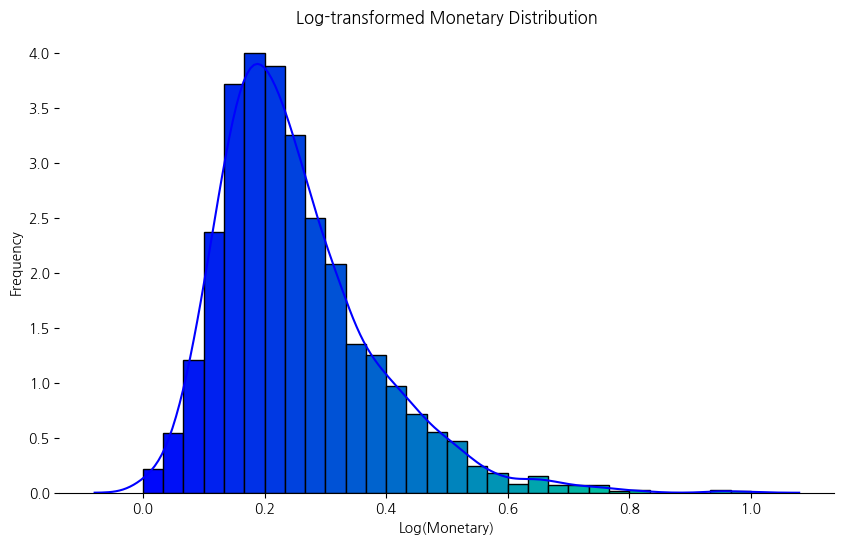

In [101]:
# 로그변환
rfm_repurchase['monetary_log'] = np.log1p(rfm_repurchase['monetary'])

# MinMax 스케일링
scaler = MinMaxScaler()
rfm_repurchase['monetary_log_norm'] = scaler.fit_transform(rfm_repurchase['monetary_log'].values.reshape(-1,1))

# 히스토그램 생성
fig, ax = plt.subplots(figsize=(10, 6))
sns.despine(left=True)
n, bins, patches = plt.hist(rfm_repurchase['monetary_log_norm'], bins=30, edgecolor='black', density=True)

# 'winter' 팔레트를 사용하여 각 막대 색상 설정
palette = sns.color_palette('winter', len(patches))
for color, patch in zip(palette, patches):
    patch.set_facecolor(color)

# KDE plot 추가
sns.kdeplot(rfm_repurchase['monetary_log_norm'], color='blue', ax=ax)

plt.title('Log-transformed Monetary Distribution')
plt.xlabel('Log(Monetary)')
plt.ylabel('Frequency')
plt.show()

In [102]:
# 불필요한 컬럼 삭제
rfm_repurchase = rfm_repurchase.drop(['recency_log','frequency_log', 'monetary_log'], axis=1)

rfm_repurchase.head()

,고객 고유 ID,recency,Frequency,monetary,recency_log_norm,frequency_log_norm,monetary_log_norm
0,CUSTOMER_Unique_60785,301,2,160.24,0.854569,0.000000,0.154663
12,CUSTOMER_Unique_01788,52,2,207.51,0.532122,0.000000,0.182345
13,CUSTOMER_Unique_62455,208,2,1441.62,0.786362,0.000000,0.390611
40,CUSTOMER_Unique_01137,428,2,168.22,0.919615,0.000000,0.159864
51,CUSTOMER_Unique_08998,420,3,801.15,0.916127,0.196191,0.327415


## 클러스터링

In [103]:
rfm_log_scaled = rfm_repurchase[['recency_log_norm','frequency_log_norm', 'monetary_log_norm']]
rfm_log_scaled

,recency_log_norm,frequency_log_norm,monetary_log_norm
0,0.854569,0.000000,0.154663
12,0.532122,0.000000,0.182345
13,0.786362,0.000000,0.390611
40,0.919615,0.000000,0.159864
51,0.916127,0.196191,0.327415
...,...,...,...
81676,0.497638,0.000000,0.213725
81678,0.746997,0.000000,0.160397
81738,0.797543,0.000000,0.363983
83052,0.862379,0.000000,0.260354


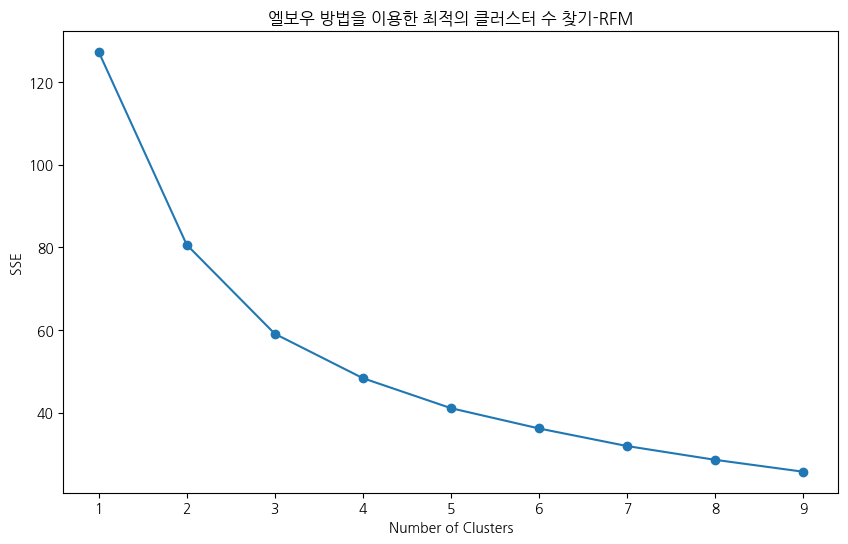

In [104]:
# 엘보우 메소드를 활용하여 최적의 클러스터 수 구하기
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_log_scaled)
    sse.append(kmeans.inertia_)

# 엘보우 그래프 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), sse, marker='o', linestyle='-')
plt.title('엘보우 방법을 이용한 최적의 클러스터 수 찾기-RFM')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

- 최적의 k는 4인 것을 확인

In [105]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
y_km = kmeans.fit_predict(rfm_log_scaled)
rfm_repurchase['RFM_Cluster'] = kmeans.labels_
rfm_repurchase.head()

,고객 고유 ID,recency,Frequency,monetary,recency_log_norm,frequency_log_norm,monetary_log_norm,RFM_Cluster
0,CUSTOMER_Unique_60785,301,2,160.24,0.854569,0.000000,0.154663,1
12,CUSTOMER_Unique_01788,52,2,207.51,0.532122,0.000000,0.182345,2
13,CUSTOMER_Unique_62455,208,2,1441.62,0.786362,0.000000,0.390611,0
40,CUSTOMER_Unique_01137,428,2,168.22,0.919615,0.000000,0.159864,1
51,CUSTOMER_Unique_08998,420,3,801.15,0.916127,0.196191,0.327415,0


## CV 계산

In [106]:
import numpy as np

cv_r = rfm_repurchase.groupby('RFM_Cluster')['recency_log_norm'].std() / rfm_repurchase.groupby('RFM_Cluster')['recency_log_norm'].mean()
cv_f = rfm_repurchase.groupby('RFM_Cluster')['frequency_log_norm'].std() / rfm_repurchase.groupby('RFM_Cluster')['frequency_log_norm'].mean()
cv_m = rfm_repurchase.groupby('RFM_Cluster')['monetary_log_norm'].std() / rfm_repurchase.groupby('RFM_Cluster')['monetary_log_norm'].mean()

# CVrn, CVfn, CVmn을 전체 CV의 합으로 나누어 w1, w2, w3 계산
# R,F,M 각 지표의 중요도가 다르기 때문에 각 지표의 합으로 최소값 나눔
w1 = np.min(cv_r) / np.sum(cv_r)
w2 = np.min(cv_f) / np.sum(cv_f)
w3 = np.min(cv_m) / np.sum(cv_m)

# 모든 가중치의 합을 1로 만들기 위해 정규화
total_w = w1 + w2 + w3
W1 = w1 / total_w
W2 = w2 / total_w
W3 = w3 / total_w

print("최종 가중치 W1:", W1)
print("최종 가중치 W2:", W2)
print("최종 가중치 W3:", W3)

최종 가중치 W1: 0.23979996722300187
최종 가중치 W2: 0.37305124826654945
최종 가중치 W3: 0.3871487845104487


## RFM 스코어 계산

- R,M 지표는 비교적 고르게 분포한 것으로 보이나 F 지표는 재구매 빈도가 너무 낮아서 Frequency 지표 자체를 4등분 하여 범주화
    - 2 → 1
    - 3,4→2
    - 5,6,7,8→3
    - 9 ~ → 4



In [151]:
# 점수화
bins=8
range_f = rfm_repurchase['Frequency'].sort_values().unique()
rfm_repurchase['R-Score'] = pd.qcut(rfm_repurchase['recency_log_norm'], q=bins, labels=range(bins, 0, -1))
rfm_repurchase['F-Score'] = rfm_repurchase['Frequency'].apply(lambda x: 1 if x == 2 else 2 if 3 <= x <= 4 else 3 if 5 <= x <= 8 else 4)
rfm_repurchase['M-Score'] = pd.qcut(rfm_repurchase['monetary_log_norm'], q=bins, labels=range(1, bins+1))

rfm_repurchase['RFM Score'] = (W1*rfm_repurchase['R-Score'].astype(float)/bins+ \
                              W2*rfm_repurchase['F-Score'].astype(float)/4+ \
                              W3*rfm_repurchase['M-Score'].astype(float)/bins)*100

In [152]:
rfm_repurchase['R-Score'] = pd.to_numeric(rfm_repurchase['R-Score'], errors='coerce')
rfm_repurchase['M-Score'] = pd.to_numeric(rfm_repurchase['M-Score'], errors='coerce')

## 재구매 고객 등급 세분화

In [153]:
# RFM Score 상위 5%, 25%, 60% 퍼센타일 계산
rfm_dia = rfm_repurchase['RFM Score'].quantile(0.95)
rfm_gold = rfm_repurchase['RFM Score'].quantile(0.75)
rfm_silver = rfm_repurchase['RFM Score'].quantile(0.40)

def assign_segment(row):
    if row['RFM Score'] >= rfm_dia:
        return 'Red Diamond'
    elif row['RFM Score'] >= rfm_gold:
        return 'Blue Diamond'
    elif row['RFM Score'] >= rfm_silver:
        return 'Pink Diamond'
    else:
        return 'Yellow Diamond'

# 고객 세분화 적용
rfm_repurchase['Segment'] = rfm_repurchase.apply(assign_segment, axis=1)

# 결과 확인
print(rfm_repurchase[['RFM Score', 'Segment']])

       RFM Score         Segment
0      25.000000  Yellow Diamond
12     47.824357    Pink Diamond
13     55.191798    Blue Diamond
40     22.002500  Yellow Diamond
51     55.525581    Blue Diamond
...          ...             ...
81676  52.663717    Pink Diamond
81678  33.992499  Yellow Diamond
81738  55.191798    Blue Diamond
83052  39.518079  Yellow Diamond
84127  44.357439    Pink Diamond

[2558 rows x 2 columns]


## ANOVA 분석 검증

In [154]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Recency에 대한 ANOVA
anova_recency = ols('recency ~ C(Segment)', data=rfm_repurchase).fit()
anova_recency = sm.stats.anova_lm(anova_recency, typ=2)

# Frequency에 대한 ANOVA
anova_frequency = ols('Frequency ~ C(Segment)', data=rfm_repurchase).fit()
anova_frequency = sm.stats.anova_lm(anova_frequency, typ=2)

# Monetary에 대한 ANOVA
anova_monetary = ols('monetary ~ C(Segment)', data=rfm_repurchase).fit()
anova_monetary = sm.stats.anova_lm(anova_monetary, typ=2)

print('Recency ANOVA')
display(anova_recency)

print('Frequency ANOVA')
display(anova_frequency)

print('Monetary ANOVA')
display(anova_monetary)

Recency ANOVA


,sum_sq,df,F,PR(>F)
C(Segment),7.996311e+06,3.0,176.418644,6.021102e-104
Residual,3.858734e+07,2554.0,NaN,NaN


Frequency ANOVA


,sum_sq,df,F,PR(>F)
C(Segment),110.975783,3.0,195.901068,2.418736e-114
Residual,482.270894,2554.0,NaN,NaN


Monetary ANOVA


,sum_sq,df,F,PR(>F)
C(Segment),9.069746e+09,3.0,22.667985,1.758640e-14
Residual,3.406292e+11,2554.0,NaN,NaN


- Recency, Frequency, Monetary에 대한 ANOVA 분석 결과 세 지표 모두 F분포는 충분히 크고, p-value는 충분히 작으므로 적절하게 분류되었음을 확인 가능

### 각 등급 별 R, F, M score 확인

In [155]:
# 각 등급 별로 RFM 점수의 범위 확인
def print_score_ranges(df,segment):
    score = df[df['Segment']==segment][['recency','Frequency','monetary']]
    score_ranges = {
        'Recency': (score['recency'].min(), score['recency'].max()),
        'Frequency': (score['Frequency'].min(), score['Frequency'].max()),
        'Monetary': (score['monetary'].min(), score['monetary'].max())
    }
    print(f"{segment}의 RFM 점수 범위:")
    print(f"{segment} Recency 범위:", score_ranges['Recency'])
    print(f"{segment} Frequency 범위:", score_ranges['Frequency'])
    print(f"{segment} Monetary 범위:", score_ranges['Monetary'])

segments= rfm_repurchase['Segment'].unique()
for segment in segments:
    print_score_ranges(rfm_repurchase,segment)

Yellow Diamond의 RFM 점수 범위:
Yellow Diamond Recency 범위: (2, 571)
Yellow Diamond Frequency 범위: (2, 6)
Yellow Diamond Monetary 범위: (37.34, 438.92)
Pink Diamond의 RFM 점수 범위:
Pink Diamond Recency 범위: (4, 661)
Pink Diamond Frequency 범위: (2, 4)
Pink Diamond Monetary 범위: (124.3, 31355.52)
Blue Diamond의 RFM 점수 범위:
Blue Diamond Recency 범위: (5, 550)
Blue Diamond Frequency 범위: (2, 5)
Blue Diamond Monetary 범위: (193.94, 414072.52)
Red Diamond의 RFM 점수 범위:
Red Diamond Recency 범위: (3, 246)
Red Diamond Frequency 범위: (2, 12)
Red Diamond Monetary 범위: (458.37, 253325.91)


### 재구매 고객 등급별 고객 수 시각화

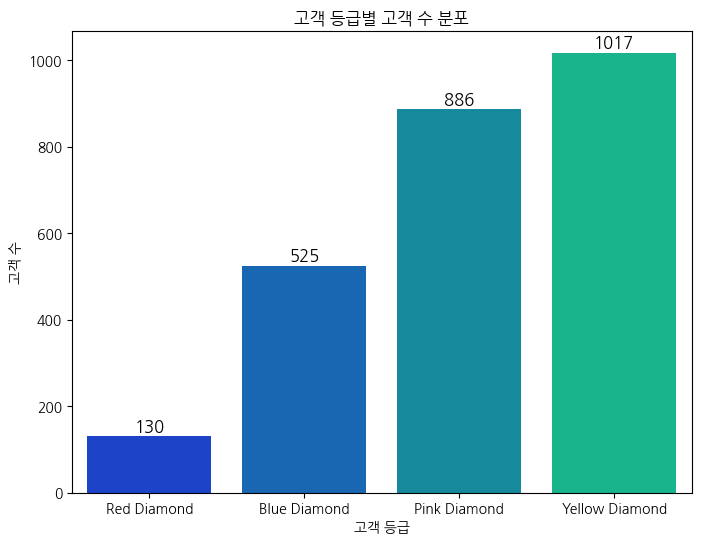

In [156]:
# 고객 등급별 고객 수 계산 및 순서 지정
customer_counts = rfm_repurchase['Segment'].value_counts().reindex(['Red Diamond', 'Blue Diamond', 'Pink Diamond', 'Yellow Diamond'])

plt.figure(figsize=(8, 6))
bars = sns.barplot(x=customer_counts.index, y=customer_counts.values, palette='winter')

# 막대 위에 숫자 표시
for bar, count in zip(bars.patches, customer_counts.values):
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_height() + 5  # 숫자를 막대 위에 조금 띄움
    bars.text(text_x, text_y, count, ha='center', va='bottom', fontsize=12)

# 그래프 제목과 축 이름 설정
plt.title('고객 등급별 고객 수 분포')
plt.xlabel('고객 등급')
plt.ylabel('고객 수')

plt.show()

### 고객 등급별 총 구매금액

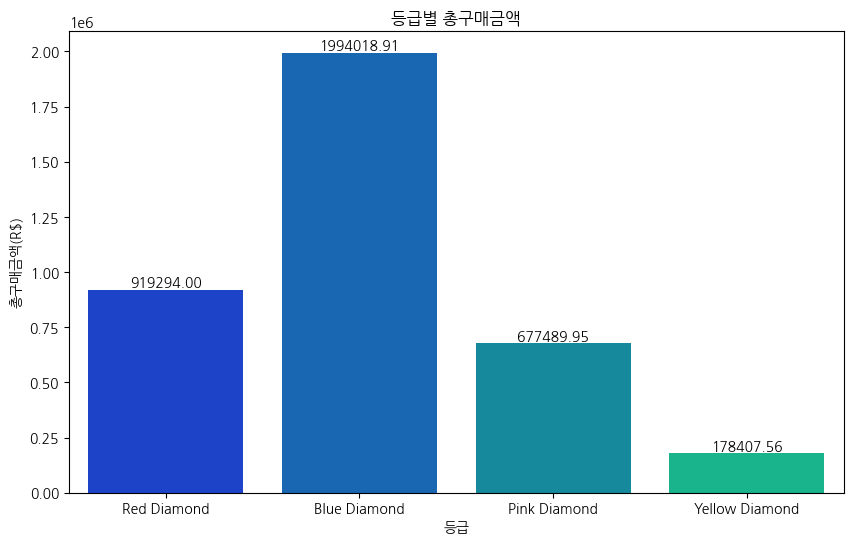

In [157]:
# 고객 그룹 별 총 거래 금액 및 고객 수 계산
grouped_sales = rfm_repurchase.groupby('Segment')['monetary'].agg(['sum', 'count']).reset_index()
grouped_sales['1인 평균 거래 금액'] = grouped_sales['sum'] / grouped_sales['count']

# 고객 그룹 순서를 지정
order = ['Red Diamond', 'Blue Diamond', 'Pink Diamond', 'Yellow Diamond']

# 지정된 순서에 맞게 데이터프레임 정렬
sorted_grouped_sales = grouped_sales.set_index('Segment').loc[order].reset_index()

# 바플롯을 그리면서 hue_order와 order에 순서를 지정
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='sum', data=grouped_sales, hue='Segment', order=order, hue_order=order, palette='winter', ci=None)

# 바에 라벨을 추가하는 코드
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

# 그래프 제목 및 레이블 설정
plt.title('등급별 총구매금액')
plt.xlabel('등급')
plt.ylabel('총구매금액(R$)')

# 그래프 표시
plt.show()

### 고객 등급별 1인 평균 구매액

In [158]:
grouped_sales

,Segment,sum,count,1인 평균 거래 금액
0,Blue Diamond,1994018.91,525,3798.131257
1,Pink Diamond,677489.95,886,764.661343
2,Red Diamond,919294.00,130,7071.492308
3,Yellow Diamond,178407.56,1017,175.425329


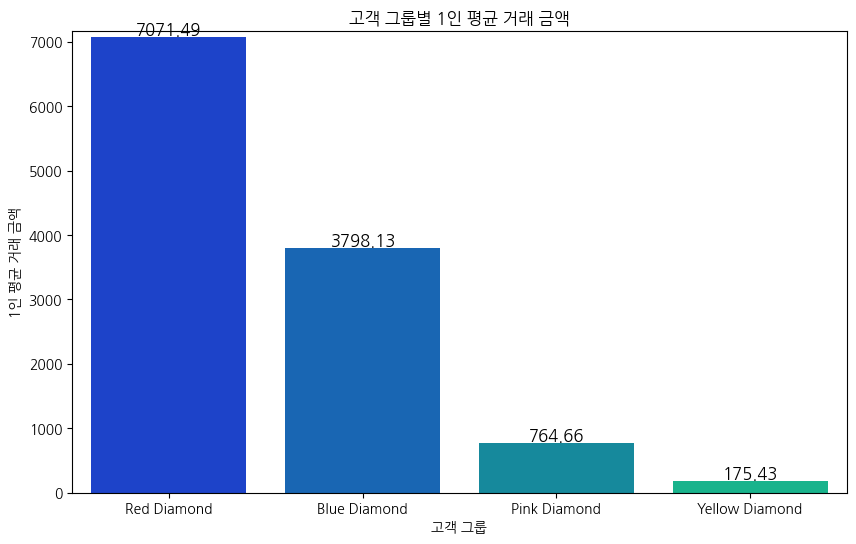

In [159]:
# 고객 그룹 별 1인 평균 거래 금액 시각화
plt.figure(figsize=(10, 6))
bars = sns.barplot(x='Segment', y='1인 평균 거래 금액', data=sorted_grouped_sales, palette='winter')

# 막대 위에 금액 표시
for bar, avg_amount in zip(bars.patches, sorted_grouped_sales['1인 평균 거래 금액']):
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_height() + 0.5  # 숫자를 막대 위에 조금 띄움
    bars.text(text_x, text_y, f'{avg_amount:.2f}', ha='center', va='bottom', fontsize=12)

# 그래프 제목과 축 이름 설정
plt.title('고객 그룹별 1인 평균 거래 금액')
plt.xlabel('고객 그룹')
plt.ylabel('1인 평균 거래 금액')
plt.ylim(0, sorted_grouped_sales['1인 평균 거래 금액'].max() + 100)  # y축 범위 설정
plt.show()

### 고객 등급별 매출 비중

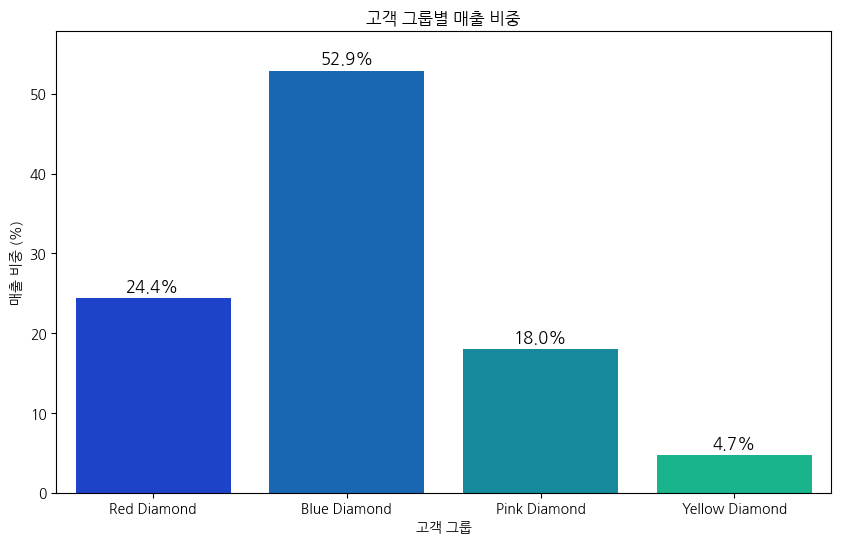

In [160]:
# 고객 등급별 매출 비중 계산
total_sales = rfm_repurchase['monetary'].sum()
rfm_df_grouped = rfm_repurchase.groupby('Segment', as_index=False)['monetary'].sum()
rfm_df_grouped['매출 백분율'] = rfm_df_grouped['monetary'] / total_sales * 100

# 고객 등급 순서를 지정
order = ['Red Diamond', 'Blue Diamond', 'Pink Diamond', 'Yellow Diamond']

# 지정된 순서에 맞게 데이터프레임 정렬
rfm_df_grouped = rfm_df_grouped.set_index('Segment').loc[order].reset_index()

# Check for NaN or Inf values and handle them
if rfm_df_grouped['매출 백분율'].isnull().any() or np.isinf(rfm_df_grouped['매출 백분율']).any():
    print("Warning: NaN or Inf values found in '매출 백분율' column. Replacing with 0.")
    rfm_df_grouped['매출 백분율'].fillna(0, inplace=True)
    rfm_df_grouped['매출 백분율'].replace([np.inf, -np.inf], 0, inplace=True)

# 고객 등급별 매출 비중 시각화
plt.figure(figsize=(10, 6))
bars = sns.barplot(x='Segment', y='매출 백분율', data=rfm_df_grouped, palette='winter')

# 막대 위에 비중 표시
for bar, perc in zip(bars.patches, rfm_df_grouped['매출 백분율']):
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_height() + 0.5  # 숫자를 막대 위에 조금 띄움
    bars.text(text_x, text_y, f'{perc:.1f}%', ha='center', va='bottom', fontsize=12)

# 그래프 제목과 축 이름 설정
plt.title('고객 그룹별 매출 비중')
plt.xlabel('고객 그룹')
plt.ylabel('매출 비중 (%)')
plt.ylim(0, rfm_df_grouped['매출 백분율'].max() + 5)  # y축 범위 설정
plt.show()

## 재구매 고객 세분화 요약

In [161]:
# 고객 그룹 별 고객 수, 비율, 총 구매금액, 1인 평균 구매금액 계산
customer_counts = rfm_repurchase['Segment'].value_counts().sort_index()
customer_percentages = customer_counts / customer_counts.sum() * 100
total_sales = rfm_repurchase.groupby('Segment')['monetary'].sum()
per_sales = round(total_sales / rfm_repurchase['monetary'].sum() * 100,2)
average_sales = total_sales / customer_counts


# 데이터 프레임 생성
summary_table2 = pd.DataFrame({
    '고객 수': customer_counts,
    '고객 비율 (%)': round(customer_percentages,2),
    '총 구매 금액': total_sales,
    '매출 비중 (%)':per_sales,
    '1인 평균 구매금액': average_sales
})

# 데이터 프레임 인덱스 설정
summary_table2.index.name = '고객 그룹'

# 고객 그룹 순서 재정렬
summary_table2 = summary_table2.reindex(order)

# 데이터 프레임 출력
summary_table2

,고객 수,고객 비율 (%),총 구매 금액,매출 비중 (%),1인 평균 구매금액
고객 그룹,,,,,
Red Diamond,130,5.08,919294.00,24.39,7071.492308
Blue Diamond,525,20.52,1994018.91,52.90,3798.131257
Pink Diamond,886,34.64,677489.95,17.97,764.661343
Yellow Diamond,1017,39.76,178407.56,4.73,175.425329
